In [1]:
#imports

import torch as torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
#hiper params
batchSize = 64
lr = 0.01
epochs = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print(device)

cuda:0


In [3]:
#descargando dataset

trainSet = datasets.FashionMNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)
testSet = datasets.FashionMNIST(root='./', train=False, transform=transforms.ToTensor(), download=True)
# data loader
trainLoader = DataLoader(trainSet, batch_size=batchSize, shuffle=True,)
testLoader = DataLoader(testSet, batch_size=batchSize, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [4]:
# arquitectura 

class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels= 12, kernel_size= 3,stride=1, padding=1) # 1 input channel, 3 output channels, 1x1 kernel size img out 28*28
        self.bn1 = nn.BatchNorm2d(12)       # img out 28*28
        self.cnn2 = nn.Conv2d(12,24,3,2,1)   # img out 14*14
        self.bn2 = nn.BatchNorm2d(24)       # img out 14*14
        self.cnn3 = nn.Conv2d(24,48,3,2,1)   # img out 7*7
        self.bn3 = nn.BatchNorm2d(48)       # img out 7*7
        self.flat = nn.Flatten()           # img out 7*7
        self.fc1 = nn.Linear(48*7*7,10)     # img out 7*7
    def forward(self,x):
        # Definicion de la forma en la que se ejecuta la arquitectura de la red
        #print(x.shape)
        x = F.relu(self.bn1(self.cnn1(x)))
        #print(f"k= 1 s= 1, shape ={x.shape}")
        x = F.relu(self.bn2(self.cnn2(x)))
        #print(f"k= 2 s= 2, shape ={x.shape}")
        x = F.relu(self.bn3(self.cnn3(x)))
        #print(f"k= 2 s= 2, shape ={x.shape}")
        x = self.flat(x)
        #print(f"k= 2 s= 2, shape ={x.shape}")
        x = self.fc1(x)
        #print(f"k= 2 s= 2, shape ={x.shape}")
        return x
    def trainer(self, model, data, lossFunction,optimizer, epochs = 2):
        # Funcion que controla el ciclo de ejecucion durante el entrenamiento de la red
        model.train()
        for epoch in range(epochs):
            print(epoch)
            for (x,y) in data:
                # llamdos al forward
                pred = model(x)
                loss= lossFunction(pred,y)
                #calgulo de los gradientes mediante backpropagation
                optimizer.zero_grad()
                loss.backward()
                #actualizar parametros
                optimizer.step()
        return
    def check_acuracy(self,model,dataLoader):
        # Funcion que calcula la performance de la red
        model.eval() #ponemos el modelo en modo evaluacion, de modo que no altera los parametros
        corrects = 0
        samples = 0

        with torch.no_grad(): #desactivamos los gradientes
            for x,y in dataLoader:
                pred = model(x)
                pred = pred.argmax(dim=1)
                corrects += (pred == y).sum()
                samples += x.shape[0]
        print('Accuracy: %.2f' % (corrects/samples))
        model.train() #reactivamos el entrenamiento
        return corrects/samples


In [5]:
#Ejemplo para probar que la arquitecutra funciona
example = torch.randn(1,1,28,28)

exampleModel = NN()
exampleModel(example)

tensor([[ 0.2688, -0.6953, -0.4171, -0.0351,  0.1456, -0.3613,  0.4305, -0.4755,
          0.2895,  0.0874]], grad_fn=<AddmmBackward0>)

In [6]:
# creando modelo

model = NN()


In [7]:
#Testeo para buscar lr 
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)
model.trainer(model, trainLoader, loss, optimizer)
model.check_acuracy(model,trainLoader)

0
1
Accuracy: 0.91


tensor(0.9128)

## lr  acuracy

0.01    0.92

0.005   0.92

0.001   0.94

0.0005  0.92

0.0001  0.89

In [8]:
# Entrenando modelo
model = NN()
loss = nn.CrossEntropyLoss()
for lr,epochs in [(0.01,2),(0.001,5),(0.0001,2)]:
    optimizer = torch.optim.Adam(model.parameters(), lr)
    model.trainer(model, trainLoader, loss, optimizer, epochs)
model.check_acuracy(model, trainLoader)

0
1
0
1
2
3
4
0
1
Accuracy: 0.96


tensor(0.9636)

In [ ]:
#guardar modelo
torch.save(model.state_dict(), 'model_CNN_0.0.2.5.2_0.pt')

T-shirt/top
T-shirt/top


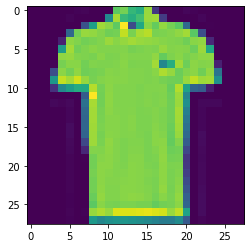

In [ ]:
# Usando el modelo
img = 85
print(trainSet.classes[model(testSet[img][0].unsqueeze(0)).argmax()] )
print(trainSet.classes[testSet[img][1]])
plt.imshow(testSet[img][0].reshape(28,28))


In [ ]:
# Acuracy final
model.check_acuracy(model, testLoader)

Accuracy: 0.91


## Resultados del entrenamiento
10 epochs = 91%

15 epochs = 